In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import fisher_exact
sns.set_theme(style ='whitegrid')
df = pd.read_csv(r'C:\projectt\data\top_100_spotify_songs_2025.csv')
df.head()

,Rank,Song_Title,Artist,Genre,Release_Date,Spotify_Streams_Millions,Popularity_Score,Duration_Seconds,Explicit
0,1,Song 1,Taylor Swift,Latin,2023-11-12,1686.11,79,282,No
1,2,Song 2,Travis Scott,Pop,2024-10-20,654.74,87,144,Yes
2,3,Song 3,Ed Sheeran,Afrobeats,2023-04-23,1739.75,99,200,Yes
3,4,Song 4,Doja Cat,Afrobeats,2023-05-21,924.50,66,282,Yes
4,5,Song 5,Imagine Dragons,Electronic,2023-03-29,833.80,72,293,Yes


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      100 non-null    int64  
 1   Song_Title                100 non-null    object 
 2   Artist                    100 non-null    object 
 3   Genre                     100 non-null    object 
 4   Release_Date              100 non-null    object 
 5   Spotify_Streams_Millions  100 non-null    float64
 6   Popularity_Score          100 non-null    int64  
 7   Duration_Seconds          100 non-null    int64  
 8   Explicit                  100 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.2+ KB


In [32]:
df['Is_hit'] = df['Popularity_Score'] >= 80
df['Duration_category'] = pd.cut(df['Duration_Seconds'], 
                                 bins = [0, 160, 220, 300],
                                 labels = ['Короткая', 'Средняя', 'Длинная'])
df['Is_hit'].value_counts()

Is_hit
True     51
False    49
Name: count, dtype: int64

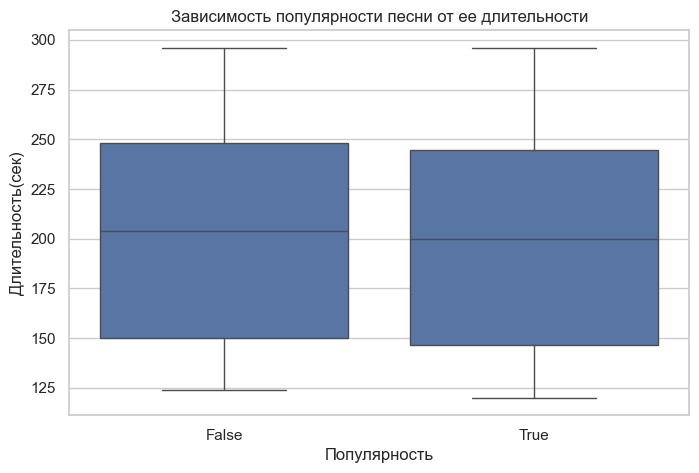

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Is_hit', y='Duration_Seconds', data=df)
plt.xlabel('Популярность')
plt.ylabel('Длительность(сек)')
plt.title('Зависимость популярности песни от ее длительности')
plt.show()

In [34]:
hit_duration = df[df['Is_hit'] == True]['Duration_Seconds']
mon_hit_duration = df[df['Is_hit'] == False]['Duration_Seconds']
t_stat, p_val = stats.mannwhitneyu(hit_duration, mon_hit_duration)
print(f'U-критерий Манна-Уитни: U={t_stat:.2f}, p={p_val:.4f}')

U-критерий Манна-Уитни: U=1142.50, p=0.4627


Мы проверили гипотезу "Популярность песни зависит от ее длительности"
Для этого использовали U-Критерий Манна-Уитни.
Вывод: статистически значимой разницы в длительности между хитами и непопулярными треками нет.

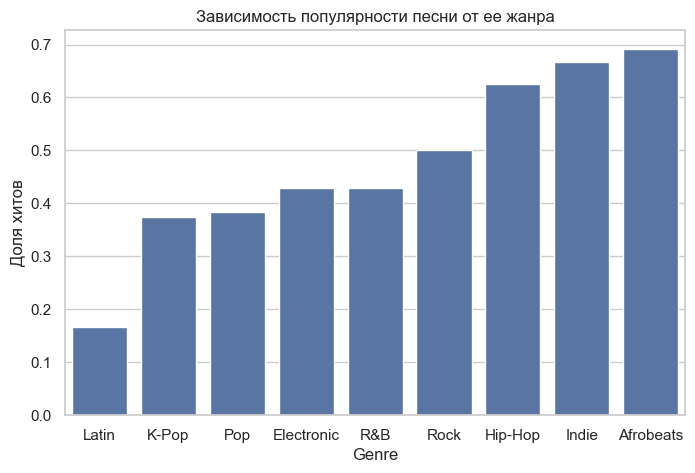

In [35]:
Genre_hit = df.groupby('Genre')['Is_hit'].mean().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=Genre_hit.index, y=Genre_hit.values)
plt.ylabel('Доля хитов')
plt.title('Зависимость популярности песни от ее жанра')
plt.show()

In [44]:
df['genre_group'] = df['Genre'].apply(lambda x: 'Популярные жанры' if x in ['Afrobeats', 'Indie', 'Hip-Hop'] else 'Другие жанры')
fisher_table = pd.crosstab(df['genre_group'], df['Is_hit'])
oddsratio, p_value = fisher_exact(fisher_table)
print(f'Точный критерий Фишера: Odds ratio = {oddsratio:.2f}, p = {p_value:.4f}')

Точный критерий Фишера: Odds ratio = 2.99, p = 0.0095


Мы проверили гипотезу "Вероятность того, что трек станет хитом зависит от его жанра"
Для этого использовали Точный тест Фишера.
Вывод: Статистическая значимость между жанром (Afrobeats, Indie, Hip-Hop против остальных) и вероятностью стать хитом подтверждена.
Эти жанры стоит активнее продвигать в плейлистах и рекомендациях.


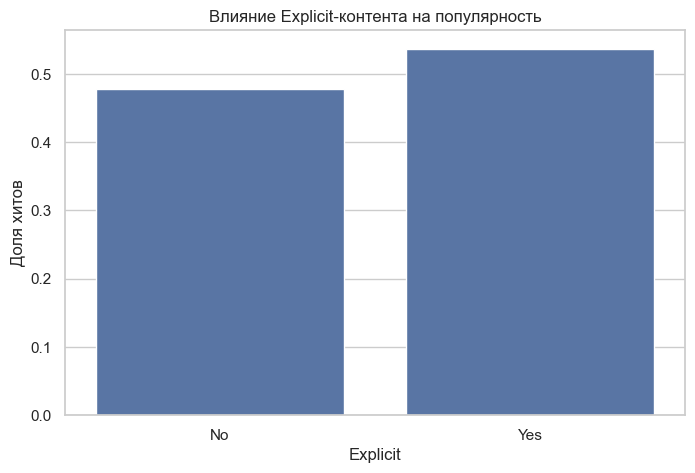

In [45]:
Explicit_hit = df.groupby('Explicit')['Is_hit'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=Explicit_hit.index, y=Explicit_hit.values)
plt.ylabel('Доля хитов')
plt.title('Влияние Explicit-контента на популярность')
plt.show()

In [49]:
Explicit_true = df[df['Explicit'] == 'Yes']['Popularity_Score']
Explicit_false = df[df['Explicit'] == 'No']['Popularity_Score']
t_stat, p_val = stats.mannwhitneyu(Explicit_true, Explicit_false)
print(f'U-критерий Манна-Уитни: U={t_stat:.2f}, p={p_value:.4f}')

U-критерий Манна-Уитни: U=1202.00, p=0.0095


Мы проверили гипотезу "Популярность песни зависит от Explicit-контента"
Для этого использовали U-Критерий Манна-Уитни.
Вывод: статистическая значимость между наличием explicit-контента и вероятностью стать хитом подтверждена.
Explicit-контент стоит учитывать при продвижении плейлистов и рекомендаций.

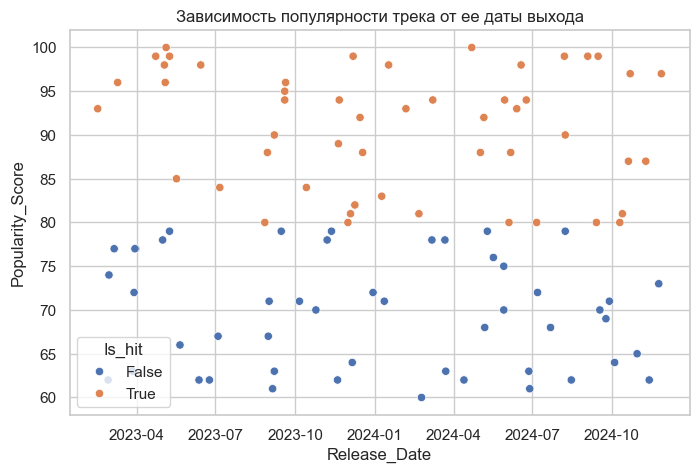

In [50]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
plt.figure(figsize=(8,5))
sns.scatterplot(x='Release_Date', y='Popularity_Score', data=df, hue='Is_hit')
plt.title('Зависимость популярности трека от ее даты выхода')
plt.show()

In [52]:
df['release_days'] = (df['Release_Date'] - df['Release_Date'].min()).dt.days
corr = df['release_days'].corr(df['Popularity_Score'])
print(f"Корреляция между возрастом трека и популярностью: {corr:.2f}")

Корреляция между возрастом трека и популярностью: -0.03


Мы проверили гипотезу "Популярность песни зависит от её возраста"
Для этого использовали коэффициент корреляции Пирсона.
Вывод: Статистическая значимость между возрастом трека и его популярностью не выявлена.